In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df1.society.unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [8]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df2 = df1.drop(['availability', 'society', 'balcony'], axis='columns')
df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [27]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [31]:
df3 = df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [32]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [33]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df3.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [36]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [37]:
df3[df3.BHK>20]

,area_type,location,size,total_sqft,bath,price,BHK
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [38]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
def valid_size(x):
    try:
        float(x)
    except:
        return False
    return True

In [40]:
df3[~df3['total_sqft'].apply(valid_size)]

,area_type,location,size,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [66]:
df3.drop(['area'], axis='columns', inplace = True)

C:\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
def make_sqft_valid(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [68]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(make_sqft_valid)

In [69]:
df4.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [72]:
df5 = df4.copy()
df5['ppsqft'] = df5['price']*100000/df5['total_sqft']

In [75]:
df5['ppsqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: ppsqft, dtype: float64

In [85]:
df5.location = df5.location.apply(lambda x:x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
least_priority_location = location_stats[location_stats<=10]

In [86]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in least_priority_location else x)

In [88]:
df5.head(20)

,area_type,location,size,total_sqft,bath,price,BHK,ppsqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [89]:
len(df5.location.unique())

242

In [90]:
#There are some data which are valid but do not  make sense.
#Those data are called Outliers

In [95]:
#House Area Anomalies
df5[df5.total_sqft/df5.BHK < 300].shape

(744, 8)

In [108]:
df6 = df5[~(df5.total_sqft/df5.BHK < 300)]
df6.shape

(12502, 8)

In [100]:
#ppsqft Anomalies
df6.ppsqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: ppsqft, dtype: float64

In [101]:
# function to remove above anomalies using standard deviation
def remove_ppsqft_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.ppsqft)
        sd = np.std(sub_df.ppsqft)
        reduced_df = sub_df[(sub_df.ppsqft>(m-sd)) & (sub_df.ppsqft<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [110]:
df7 = remove_ppsqft_outliers(df6)

In [111]:
df7.head(10)

,area_type,location,size,total_sqft,bath,price,BHK,ppsqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,Super built-up Area,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,Super built-up Area,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,Super built-up Area,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,Super built-up Area,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,Built-up Area,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [112]:
df7.ppsqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: ppsqft, dtype: float64

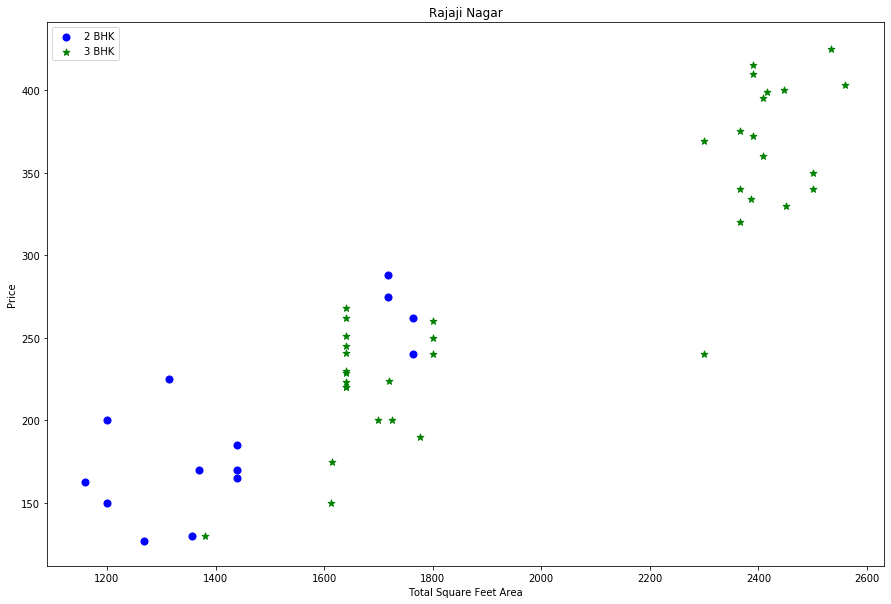

In [114]:
def plot_scatter(df,location):
    bhk2 = df[(df.location==location) & (df.BHK == 2)]
    bhk3 = df[(df.location==location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='*', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter(df7,"Rajaji Nagar")

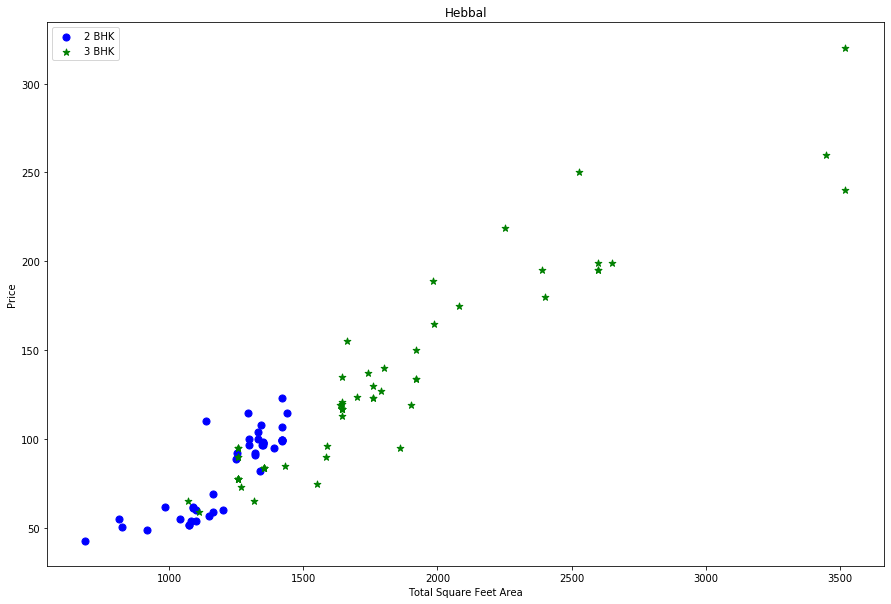

In [117]:
plot_scatter(df7, "Hebbal")

# handling data in which the price of 2 BHK is more than 3 BHK for the same location

In [118]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.ppsqft),
                'std' : np.std(bhk_df.ppsqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')


In [120]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 8)

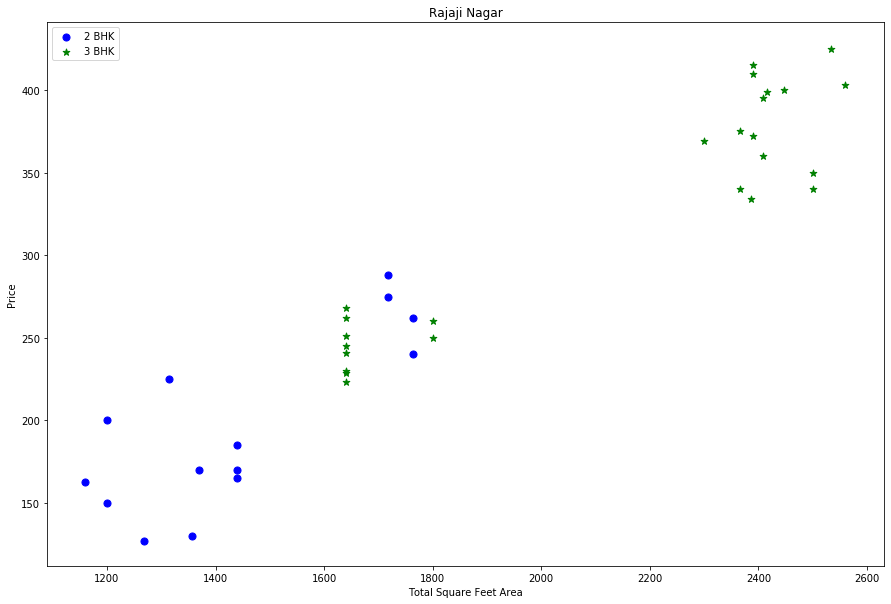

In [123]:
plot_scatter(df8,"Rajaji Nagar")

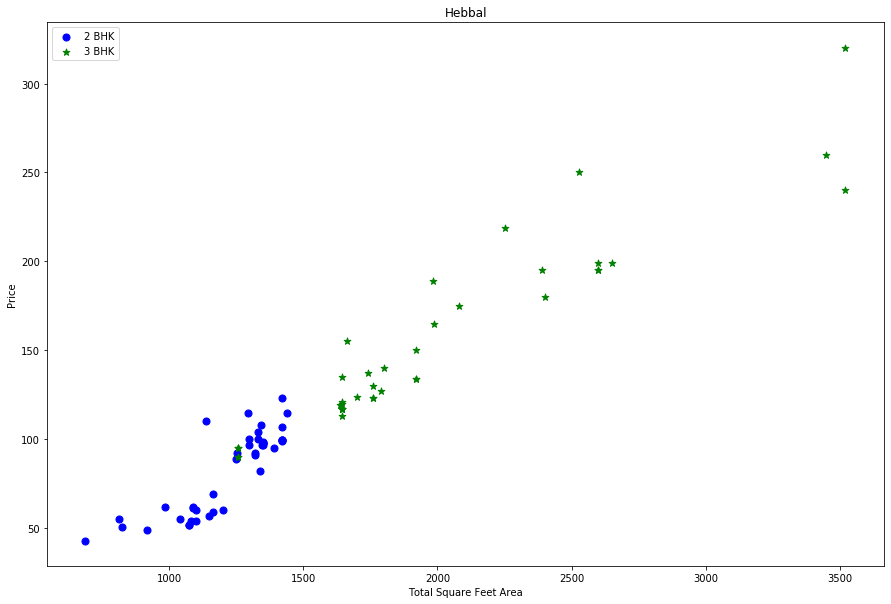

In [124]:
plot_scatter(df8, "Hebbal")

Text(0, 0.5, 'count')

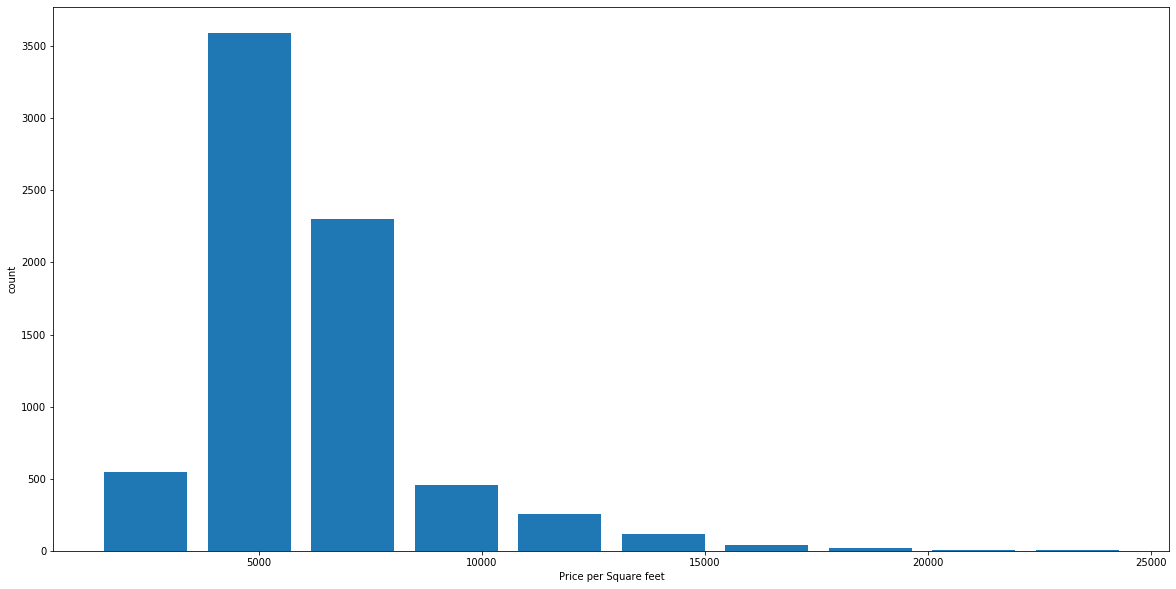

In [125]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.ppsqft, rwidth=0.8)
plt.xlabel("Price per Square feet")
plt.ylabel("count")

In [127]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7251, 8)

In [131]:
df10 = df9.drop(['ppsqft','size', 'area_type'], axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [133]:
#Encoding  text data
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ML Model

In [136]:
x = df12.drop('price', axis='columns')  # Independent variables set

In [137]:
y = df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [139]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8452277697874312

In [143]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [146]:
#GridSearchCv to find best model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(x,y):
    algos = {
        'linearRegression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
              'model' : Lasso(),
              'params' : {
                  'alpha' : [1,2],
                  'selection' : ['random', 'cyclic']
              }
        },
        'DecisionTree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
               }
        }
            
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])


In [147]:
best_model(x,y)

,model,best_score,best_params
0,linearRegression,0.818354,{'normalize': True}
1,lasso,0.687441,"{'alpha': 1, 'selection': 'random'}"
2,DecisionTree,0.724922,"{'criterion': 'mse', 'splitter': 'best'}"


In [156]:
# Linear Regression is the best model
def predict_price(location, total_sqft, bath, BHK):
    loc_index = np.where(x.columns==location)[0][0]
    
    tmp = np.zeros(len(x.columns))
    tmp[0] = total_sqft
    tmp[1] = bath
    tmp[2] = BHK
    if loc_index >= 0:
        tmp[loc_index] = 1
    return reg.predict([tmp])[0]
    

In [157]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677179224

# Exporting files

In [158]:
import pickle
with open('Bengaluru_House_Data.pickle', 'wb') as f:
    pickle.dump(reg,f)

In [159]:
import json
columns = {
    'data-columns' : [col.lower()  for col in x.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))